# Homework 5
*Jinyi Zhou | u1424752*

In [79]:
# Imports and setup. 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part 1: MNIST Handwritten Digits

We will scale the data before running them through our algorithms, which will also alter their appearance when we plot them. 

In [80]:
# Code to scale images...

digits = load_digits()
X = scale( digits.data )
y = digits.target

n_samples, n_features = X.shape
n_digits = len( np.unique(digits.target) )

print( "n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features) )

n_digits: 10, n_samples 1797, n_features 64


In [81]:
# This is what one digit (the "zero") looks like:

print( "===\nThe raw data" )
print( digits.images[0] )

print( "===\nThe scaled data" )
print( X[0] )

print( "===\nThe digit" )
print( digits.target[0] )

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

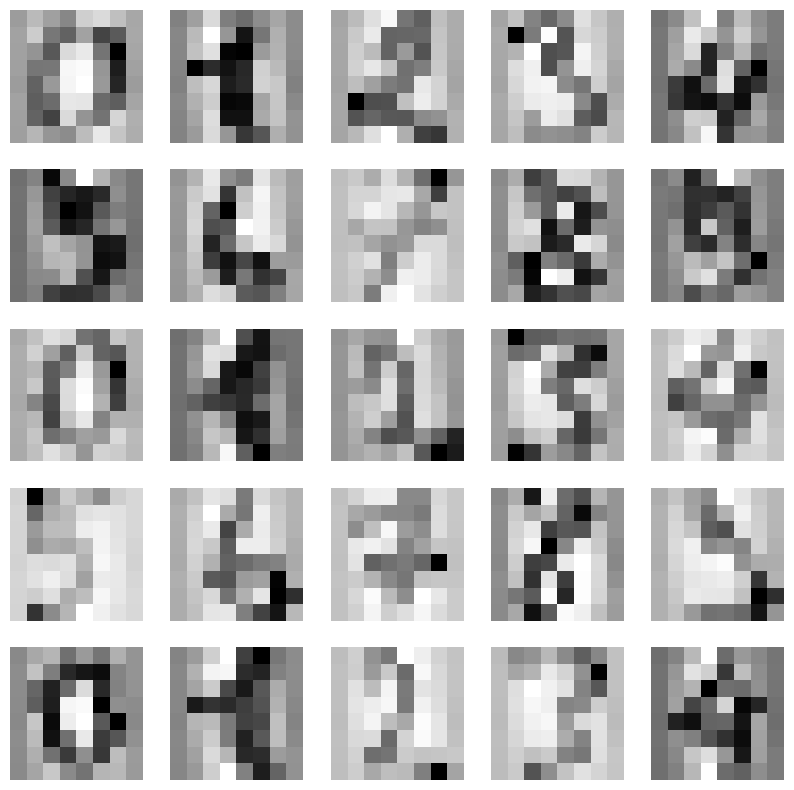

In [82]:
# Display the first 25 images...

plt.figure( figsize=(10, 10) )
 
for ii in np.arange( 25 ):
    plt.subplot( 5, 5, ii+1 )
    plt.imshow( np.reshape( X[ii,:], (8,8) ), cmap='Greys', interpolation='nearest' )
    plt.axis( 'off' )

plt.show()

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command:
``train_test_split( X, y, random_state=1, test_size=0.8 )``

In [83]:
XTrain, XTest, yTrain, yTest = train_test_split( X, y, random_state=1, test_size=0.8 )

2. Use SVM with an rbf kernel and the cost parameter C=5 to build a classifier using the training dataset.

In [84]:
model = svm.SVC(kernel='rbf', C=5)
model.fit(XTrain, yTrain)

SVC(C=5)

3. Using the test dataset, evaluate the accuracy of the model. Again using the test dataset, compute the confusion matrix. What is the most common mistake that the classifier makes?

In [85]:
y_pred = model.predict(XTest)
print(metrics.confusion_matrix(yTest,y_pred))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]


4. Display all of the misclassified digits as images (title with: Predicted #, Actual #).

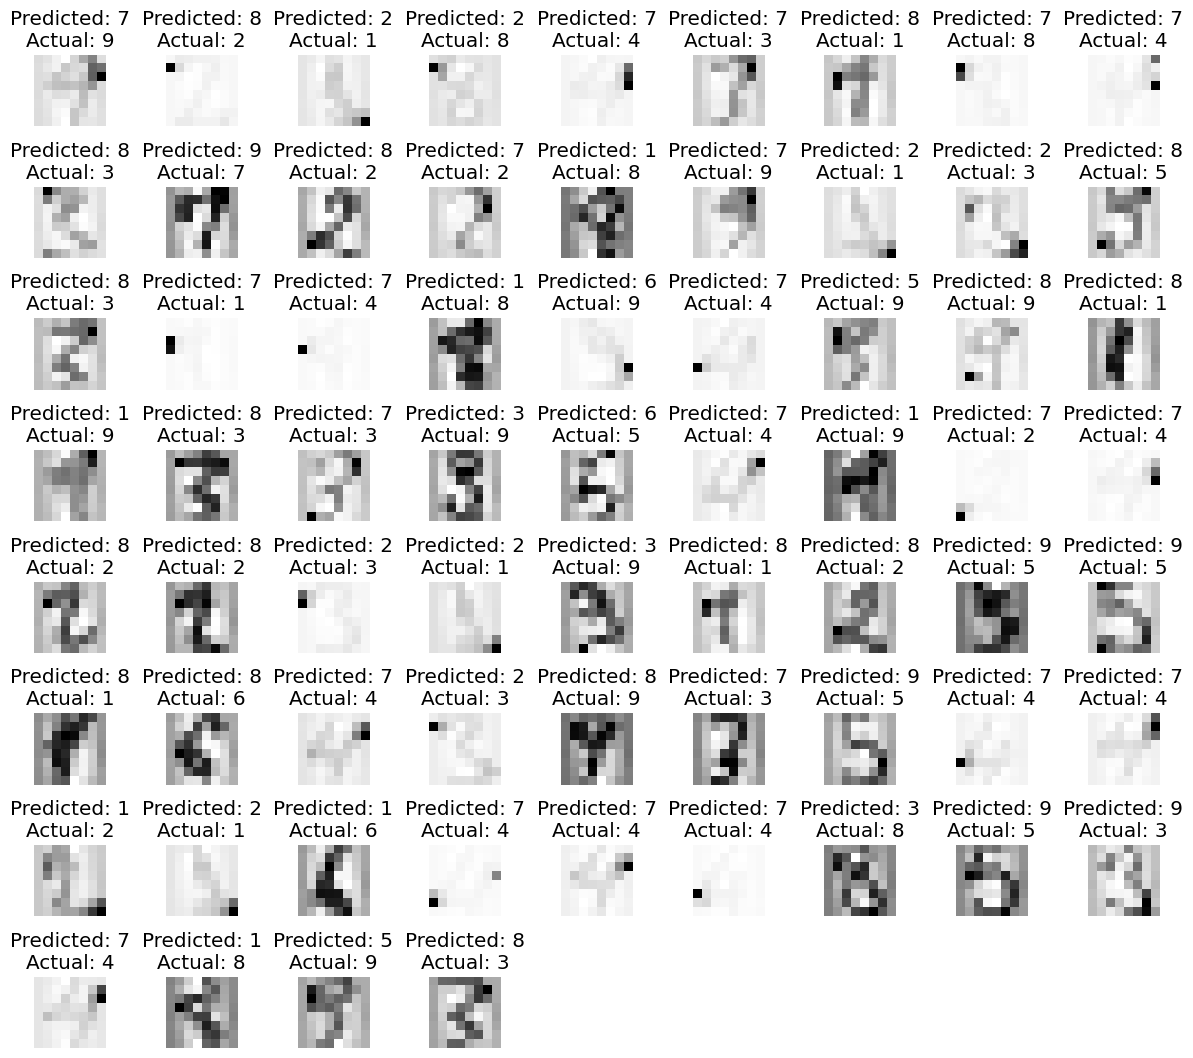

In [86]:
mis_index = np.where(yTest != y_pred)[0]

plt.figure(figsize=(12, 12))
num_rows = int(np.ceil(np.sqrt(len(mis_index))))
for i, index in enumerate(mis_index):
    plt.subplot(num_rows, num_rows, i + 1)
    plt.imshow(np.reshape(XTest[index], (8, 8)), cmap='Greys')
    plt.title(f"Predicted: {y_pred[index]}\nActual: {yTest[index]}")
    plt.axis('off')
plt.box(False)
plt.tight_layout()  
plt.show()

5. Using the ``cross_val_score`` function, evaluate the accuracy of the SVM for different values of the parameter ``C``: .5 to 5 (by .1) and then 10-50 (by 20). What is the best value? (Graph results)

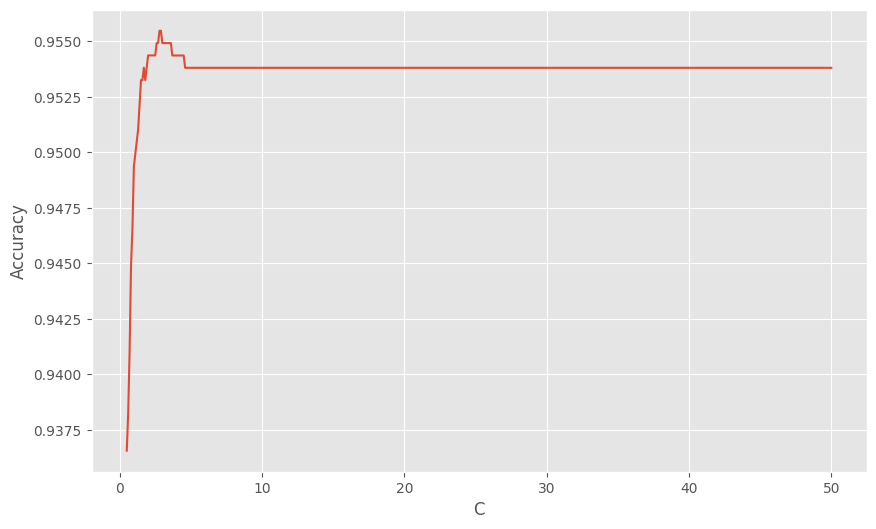

best C value is 2.7999999999999994


In [87]:
CVals = np.concatenate((np.arange(0.5, 5.1, 0.1), np.arange(10, 51, 20)))
accuracies = []
for C in CVals:
    model = svm.SVC(kernel='rbf', C=C)
    scores = cross_val_score(model, X, y, cv=5)
    accuracy = np.mean(scores)
    accuracies.append(accuracy)
plt.plot(CVals, accuracies)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

print("best C value is", CVals[np.argmax(accuracies)])

Train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [88]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=1, test_size=0.8)
svm_raw = svm.SVC(kernel='rbf', C=5)
svm_raw.fit(X_train, y_train)
print("accuracy is ", svm_raw.score(X_test, y_test))

accuracy is  0.9756606397774688


### Task 1.2: Prediction with K-nearest Neighbors

Repeat task 1.1 using k-nearest neighbors (k-NN). In part 1, use k=10. In part 5, find the best value of k.

1. Split the data into a training and test set (K = 10).

In [89]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.8)

2. Build a classifier using the training dataset.

In [90]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(XTrain, yTrain)

KNeighborsClassifier(n_neighbors=10)

3. Compute the confusion matrix.

In [91]:
yPred = model.predict(XTest)
print(metrics.confusion_matrix(yTest, yPred))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]


4. Display all of the misclassified digits as images (title with: Predicted #, Actual #).

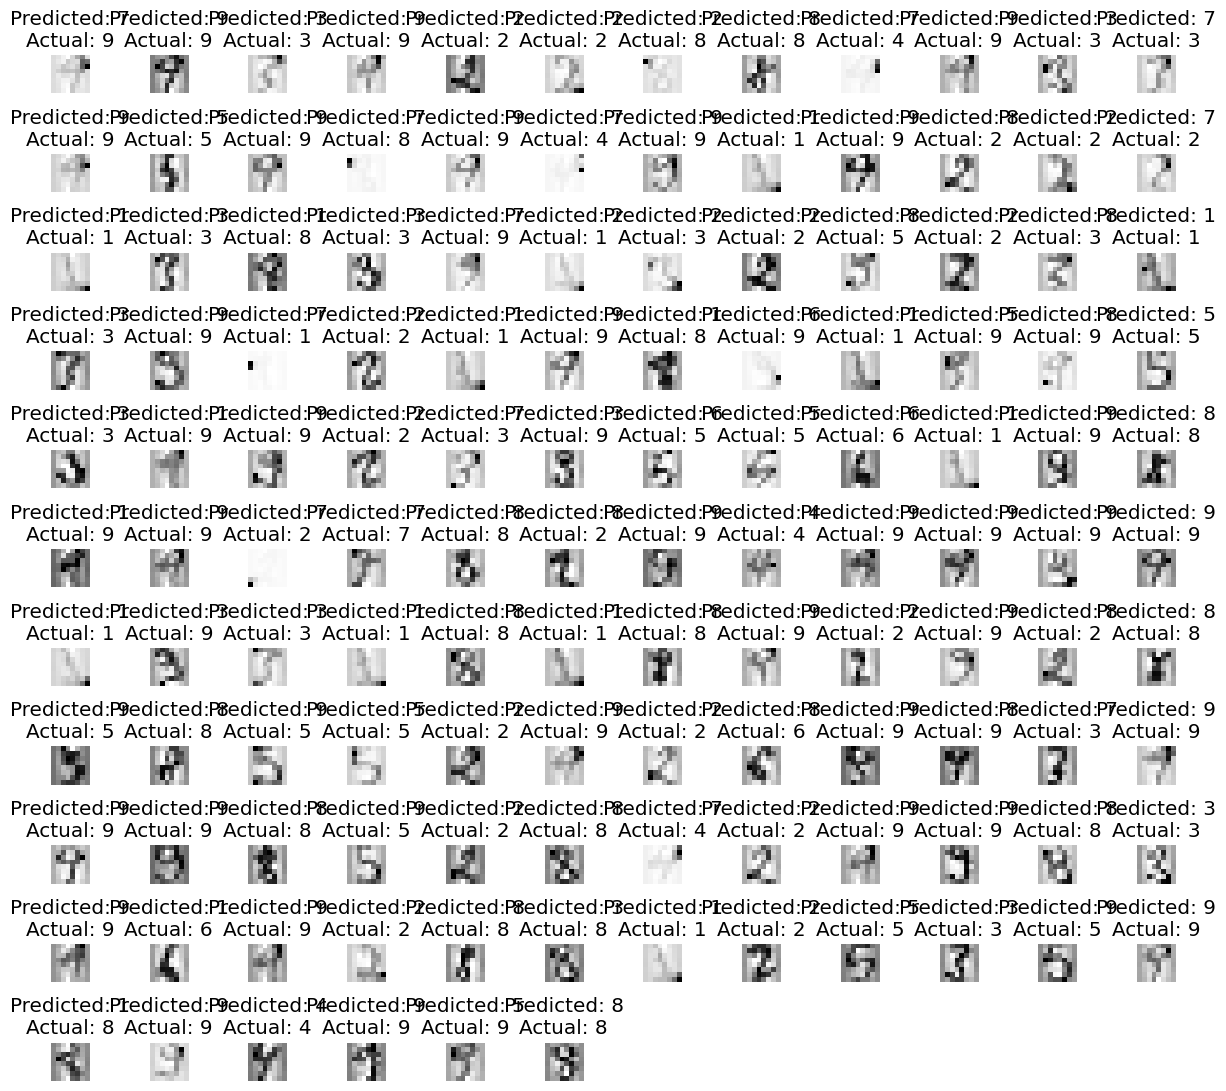

In [92]:
misIndex = np.where(yTest != yPred)[0]

plt.figure(figsize=(12, 12))
num_rows = int(np.ceil(np.sqrt(len(misIndex))))
for i, index in enumerate(misIndex):
    plt.subplot(num_rows, num_rows, i + 1)
    plt.imshow(np.reshape(XTest[index], (8, 8)), cmap='Greys')
    plt.title(f"Predicted: {y_pred[index]}\nActual: {yTest[index]}")
    plt.axis('off')
plt.box(False)
plt.tight_layout()  
plt.show()

5. Find the best value of K.

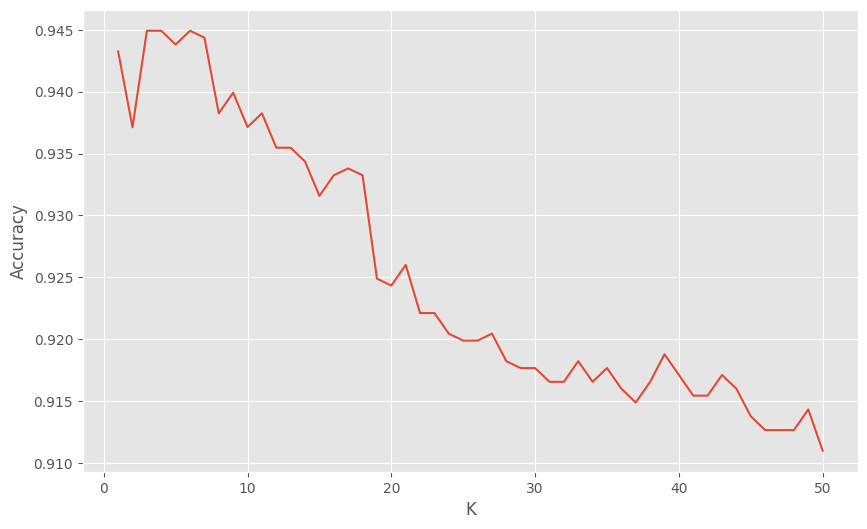

best k value is 3


In [93]:
kVals = np.arange(1, 51)
accuracies = []
for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    accuracy = np.mean(scores)
    accuracies.append(accuracy)
plt.plot(kVals, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
print("best k value is", kVals[np.argmax(accuracies)])

Train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [94]:
XTrain, XTest, yTrain, yTest = train_test_split(digits.data, digits.target, random_state=1, test_size=0.8)
knn_raw = KNeighborsClassifier(n_neighbors=10)
knn_raw.fit(X_train, y_train)
print("accuracy is", knn_raw.score(XTest, yTest))

accuracy is 0.9388038942976356


## Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. 

### Task 2.1: Import the Data

Use the ``pandas.read_csv()`` function to import the dataset.

In [95]:
dataset = pd.read_csv('OnlineNewsPopularity.csv')
dataset.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


To use ``scikit-learn``, we'll need to save the data as a numpy array. Use the ``dataframe.values`` method to export the predictor variables as a numpy array called ``X`` - this array should not include our target variable (the number of shares). Also, we don't need the url and timedelta, so drop these columns.

In [96]:
dataset.columns = dataset.columns.str.strip()
dataset = dataset.drop(['url', 'timedelta'], axis=1)
X = dataset.drop('shares', axis=1).values

Export the number of shares as a separate numpy array, called ``shares``. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, y, which indicates whether or not each article is popular.

In [97]:
shares = dataset['shares'].values
threshold = np.median(shares)
y = np.where(shares > threshold, 1, 0) # 1: true; 0: false
y

array([0, 0, 1, ..., 1, 0, 0])

### Task 2.2: Exploratory Data Analysis

First check to see if the values are reasonable. What are the min, median, and maximum number of shares?

In each of the following tasks, make sure to show enough information to explain your results (graphs, images, etc, as necessary).

In [98]:
dataset['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

### Task 2.3: Classification Using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data?

In [99]:
scores = [0 for x in range(0, 21)]
for kVals in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=kVals)
    scores[kVals] = np.mean(cross_val_score(model, X, y, cv=10))
# print(scores)
print("best K value is", np.argmax(scores))

best K value is 13


### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data.

- SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles.
- Experiment with different Cs. Which is the best value for C?

Note that it takes multiple minutes per value of C to run on the whole dataset!

In [102]:
X_svm = X[0: 5000]
y_svm = y[0: 5000]
scores = [0]
for cVal in np.arange(0.1, 6.1, 0.1):
    model = svm.SVC(kernel='rbf', C=cVal)
    scores.append(np.mean(cross_val_score(model, X_svm, y_svm, cv=10)))
print("best C value is", np.argmax(scores) / 10)
print("accuracy is", scores[np.argmax(scores)])

best C value is 0.1
accuracy is 0.5618000000000001


### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data.

Use cross validation to choose good values of the max tree depth (max_depth) and minimum samples split (min_samples_split).

In [ ]:
scores = [[0 for x in range(31)]]
for md in range(1, 31):
    scores.append([0, 0])
    for mss in range(2, 31):
        model = tree.DecisionTreeClassifier(min_samples_split=mss, max_depth=md)
        scores[md].append(np.mean(cross_val_score(model, X, y, cv=10, n_jobs=-1)))

np_scores = np.array(scores)

# max tree depth and minimum samples split 
print(np.unravel_index(np.argmax(np_scores, axis=None), np_scores.shape))
print("accuracy is", np.amax(np_scores))

*The dicision tree:*

[Text(0.5940234483092046, 0.9722222222222222, 'x[25] <= 2882.048\ngini = 0.5\nsamples = 39644\nvalue = [20082, 19562]'),
 Text(0.33860891302114776, 0.9166666666666666, 'x[15] <= 0.5\ngini = 0.48\nsamples = 20029\nvalue = [12036, 7993]'),
 Text(0.2358342426167237, 0.8611111111111112, 'x[14] <= 0.5\ngini = 0.461\nsamples = 15411\nvalue = [9863, 5548]'),
 Text(0.15132611252264036, 0.8055555555555556, 'x[21] <= 654150.0\ngini = 0.45\nsamples = 14594\nvalue = [9599, 4995]'),
 Text(0.06474844557087274, 0.75, 'x[36] <= 0.5\ngini = 0.499\nsamples = 2771\nvalue = [1447, 1324]'),
 Text(0.04374019965452472, 0.6944444444444444, 'x[28] <= 2240.096\ngini = 0.495\nsamples = 2489\nvalue = [1365, 1124]'),
 Text(0.02379073170322667, 0.6388888888888888, 'x[24] <= 2861.15\ngini = 0.487\nsamples = 1720\nvalue = [996, 724]'),
 Text(0.010960664452941572, 0.5833333333333334, 'x[57] <= 0.287\ngini = 0.457\nsamples = 499\nvalue = [323, 176]'),
 Text(0.007213473535922721, 0.5277777777777778, 'x[1] <= 961.5\ngini

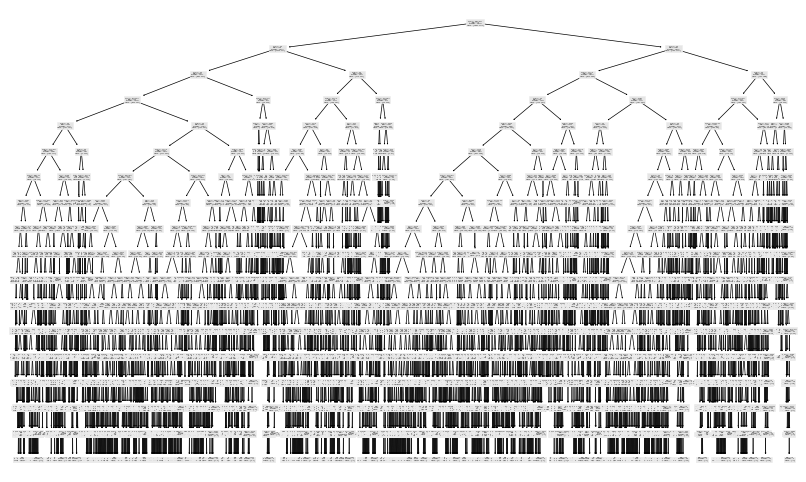

In [105]:
model = tree.DecisionTreeClassifier(min_samples_split=4, max_depth=17)
model.fit(X, y)
tree.plot_tree(model)

### Task 2.6 Describe your findings


1. Which method (k-NN, SVM, Decision Tree) worked best?

*Based on the accuracy of each method, KNN works the best.*

2. How did different parameters influence the accuracy?

*For KNN, increasing k will underfit the data and make it less accurate. When k decreases, the data will be over-fitted and less accurate. For SVM, increasing c will overfit the data; decreasing c will underfit the data. For Decision Tree, increasing the max depth or decreasing the min samples split overfits the data and thus decreases the accuracy; decreasing max depth or increasing min samples will underfit the data, which reduce the accuracy too.*

3. Which model is easiest to interpret?

*Decision Tree. The reason is because that the decisions it makes are easily described. Also, decision tree can be visualized, which makes it easy to read.*

4. How would you interpret your results?

*For KNN, increasing k will underfit the data and make it less accurate. When k decreases, the data will be over-fitted and less accurate.* 

*For SVM, increasing c will overfit the data; decreasing c will underfit the data.*

*For Decision Tree, increasing the max depth or decreasing the min samples split overfits the data and thus decreases the accuracy; decreasing max depth or increasing min samples will underfit the data, which reduce the accuracy too.*